<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/resamplng_methods_exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=dedd0fc495de2e4d19f1a2c7df65577a7405072a77a95541e31ff39e0c2c78f9
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


# Librerias


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data
from ISLP.models import ModelSpec as MS
from ISLP.models import poly
from ISLP import confusion_table
from ISLP.models import summarize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm





# Conceptual

## 2

a. La probabilidad de ser elegido en un muestra de tamano n y con reemplazo es de 1/n para todos los casos. Por lo que la probabilidad de no ser la jth sera de:

$$1-\frac{1}{n}$$

b. Tenemos que de la misma forma la probabilidad de que la segunda observacion del bootstrap sea la jth observacion de nuestra muestra sera de:
$$1-\frac{1}{n}$$

c. La probabilidad de que una observacion j no este en el bootstrap
$$1-\frac{1}{n}$$
Y de que toda la muestra sea no este sera de:
$$(1-\frac{1}{n})\times(1-\frac{1}{n}) ... n\ veces$$

si la bootstrap esta compuesta unicamente de de esa observacion tenemos que multiplicar sus ocurrencias ya que son eventos independientes. ya que son con reemplazo. cada muestreo no altera el estado de las cosas.


d. En el caso que $n=5$ la probabilidad de que el jth observacion de la muestre este en el bootstrap smaple sera de:
$$1 - (1-\frac{1}{n})$$

In [ ]:
def is_not_bootstrap(n):
  return (1-1/n) ** n

In [ ]:
1 - is_not_bootstrap(5)

0.632120577028895

e. $n =100$

In [ ]:
1 - is_not_bootstrap(100)

0.6339676587267709

f. $h=10000$

In [ ]:
1 - is_not_bootstrap(10000)

0.6321389535670295

la probabilidad de que el elemento jth este en la bootstrap sample es del 63%

g. calculando con diferentes valores de n y graficnado

<Axes: >

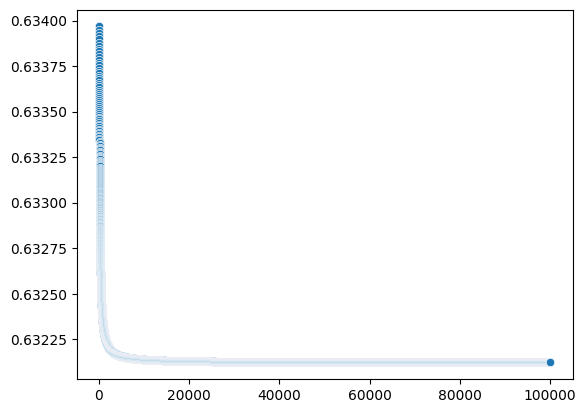

In [ ]:
n = np.arange(100, 100000)
f_n = 1 - is_not_bootstrap(n)
sns.scatterplot(x=n, y=f_n)

In [ ]:
1/100

0.01

## 3

a

Cross Validated esta implementado mediante el uso de k grupos. y el primer grupo es tratado como el de validacion hasta llegar al k - 1

b

La ventaja para el caso del set de validacion es que la cantidad de veces que se correra un modelo sera menor a n. En este caso k., sin embargo esto tambien trae un deventaja debido a que con el modo de LOOCV, tenemos que los estimados o valores reales de los errores seran insesgados mientras que con k no pasaria. Llevandonos a un problema de bias.

'Por otro lado tenemos que el Kfold tiene uhn ventaja en la autocorrelacion debido a que los grupos seran diferenciados y noi se relacioaran mucho lo que significa que tednran menor varianza que los LOOCV.


## 4

lo que buscamos es obtener la desviacion standar de una respuestas para una determianda configuracion de x0.
Entonces necesitamos usar bootstrap para generarnos diferentes dataframes.
Co n la data procedemos a aplicar la formula

# Applied

## 5

In [ ]:
# usaremos la data set de default para hacer una regeresiones logisticas y luego
# usar el validation set.
# cargando data
df = load_data("Default")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
features = ["balance", "income"]
y = df.default

In [ ]:
# disenando modelo
design = MS(features)
X = design.fit_transform(df)

In [ ]:
# haciendo la particion de los datos
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0)
y_test = y_test == "Yes"
y_train = y_train == "Yes"

### a

### SM

In [ ]:
import statsmodels.api as sm
models = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = models.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -364.78
Date:                Mon, 15 Dec 2025   Deviance:                       729.56
Time:                        00:22:09   Pearson chi2:                 2.57e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1125
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.3896      0.635    -17.935      0.0

In [ ]:
predicted = results.predict(X_test)

In [ ]:
np.mean(predicted > 0.5)

np.float64(0.0134)

In [ ]:
print(confusion_table(y_test, predicted > 0.2))

Truth      False  True 
Predicted              
False       4697    117
True          82    104


### SKlearn

In [ ]:
# modelo
model = LogisticRegression()
model.fit(X_train, y_train)


Truth      False  True 
Predicted              
False       4697    117
True          82    104


### b

In [ ]:
results = model.predict_proba(X_test)
predicted_classes = results[:, 1] > 0.5
confusion = confusion_table(y_test, predicted_classes)
confusion

Truth,False,True
Predicted,,
False,4801,13
True,132,54


In [ ]:
(confusion.iloc[1, 0] + confusion.iloc[0,1] )/ (confusion.iloc[0,1] + confusion.iloc[0,0])

np.float64(0.030120481927710843)

### c

In [ ]:
#different validation sets
# 1
for i in [1, 6, 8, 9]:
  X_train, X_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.5,
                                                      random_state=i)
  y_test = y_test == "Yes"
  y_train = y_train == "Yes"

  model = LogisticRegression()
  model.fit(X_train, y_train)

  predicted = model.predict_proba(X_test)
  predicted = predicted[:, 1] > 0.5
  confusion = confusion_table(y_test, predicted)
  print(confusion)
  print(f"error: {(confusion.iloc[1, 0] + confusion.iloc[0,1] )/ (confusion.iloc[0,1] + confusion.iloc[0,0])}")








/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Truth      False  True 
Predicted              
False       4813     28
True         107     52
error: 0.02788680024788267
Truth      False  True 
Predicted              
False       4816     17
True         121     46
error: 0.028553693358162633
Truth      False  True 
Predicted              
False       4831     10
True         106     53
error: 0.02396199132410659
Truth      False  True 
Predicted              
False       4826     25
True          92     57
error: 0.02411873840445269


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Podemos apreciar que lso resultados peuden variar en diferentes configuraciones de validation sets, esto promueve el hecho de que un enfoque del muestreo tiene efectos en los desarrollos de modelos.

### d

In [ ]:
# Ahora vamos a considera una variable dummmy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


In [ ]:
df.student

,student
0,No
1,Yes
2,No
3,No
4,No
...,...
9995,No
9996,No
9997,No
9998,No


In [ ]:
features = ["student", "balance", "income"]
design = MS(features)
X = design.fit_transform(df)

y = df.default

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0)
# model
model = LogisticRegression()
model.fit(X_train, y_train)

predicted = model.predict_proba(X_test)
predicted = predicted[:, 1] > 0.5
confusion = confusion_table(y_test == "Yes", predicted)
print((confusion.iloc[0,1] + confusion.iloc[1, 0]) / (confusion.iloc[0,0] + confusion.iloc[1,1]))







0.030290541932825057


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


podemos apreciar que el uso del feature student no mejora el error de pruebas anteriores que no usaron este feuature, por lo que lo descartamos.

## Ejercicio 6

In [ ]:
np.random.seed(4)

In [ ]:
# Vamos a calcular la desviacion estandar de los coeficientes de la regresion
# logistica
df = load_data('Default')

In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
df.iloc[1]

,1
default,No
student,Yes
balance,817.180407
income,12106.1347


### a

In [ ]:
# cHaADKL\;'lculo de el std de lso coeficientes usando la regresion logistica
features = ["balance", "income"]

design  = MS(features)
X = design.fit_transform(df)
y = df.default == "Yes"

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state=1)

model = sm.GLM(y_train, X_train,
               family=sm.families.Binomial())

result = model.fit()
print(summarize(result))

                coef   std err       z  P>|z|
intercept -11.858100  0.528000 -22.477    0.0
balance     0.005900  0.000000  21.078    0.0
income      0.000022  0.000006   3.707    0.0


In [ ]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -551.52
Date:                Mon, 15 Dec 2025   Deviance:                       1103.0
Time:                        23:53:25   Pearson chi2:                 4.14e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.8581      0.528    -22.477      0.0

### b

In [ ]:
def boot_fn(df: pd.DataFrame, idx: np.ndarray):
    design = MS(['income', 'balance'])

    data = df.loc[idx]

    X = design.fit_transform(data)
    y = data['default'] == 'Yes'

    lr = sm.GLM(y,
                X,
                family=sm.families.Binomial())

    results = lr.fit()
    return results.params.loc[['income', 'balance']]

In [ ]:
features = ["income", "balance"]
y = "default"
rng = np.random.default_rng(4)
idx = rng.choice(df.index, size=len(df), replace=True)
print(boot_fn(df, idx))

income     0.000024
balance    0.005428
dtype: float64


In [ ]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
# using bootstrap vamos a calcular los estimados del SE de los coeficientes
def boot_SE(func,
            df,
            B=1000,
            seed=0):

  rng = np.random.default_rng(seed)
  first, second = 0, 0
  for _ in range(B):
    idx = rng.choice(df.index, size=len(df), replace=True)
    params = func(df, idx)
    first += params
    second  += params ** 2
  return np.sqrt(second / B - (first / B) ** 2)







In [ ]:
boot_SE(boot_fn,
        df,
        1000,
        0)

,0
income,0.000005
balance,0.000230


### d

Podemos apreciar que los estimados de llos SE son muy parecidos al que encotrnamos en la regresion logistica.

## Ejercicio 7

In [ ]:
# vamos a trabajar con la data de weekly
df = load_data("Weekly")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [ ]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### a

In [ ]:
  design = MS(["Lag1","Lag2"])
  X = design.fit_transform(df)
  y = df.Direction == "Up"

In [ ]:
# modelo

modelo = LogisticRegression()
modelo.fit(X, y)
results = modelo.predict_proba(X)



In [ ]:
results = results[:, 1] > 0.5
print(confusion_table(y, results))

Truth      False  True 
Predicted              
False         38    446
True          38    567


In [ ]:
modelo.predict(X)

array([ True,  True,  True, ...,  True,  True,  True])

### b

In [ ]:
# using all but the first observation
df_loocv = df.iloc[1:, :]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [ ]:
X = design.transform(df)
X_train = X.loc[1:]
y = df.Direction == "Up"
y_train = y.loc[1:]


In [ ]:
model_loocv = LogisticRegression()
model_loocv.fit(X, y)

results = model_loocv.predict_proba(X)
results = results[:, 1] > 0.5
print(confusion_table(y, results))

Truth      False  True 
Predicted              
False         38    446
True          38    567


In [ ]:
results_loocv = model_loocv.predict_proba(X.head(1))


In [ ]:
results_loocv

array([[0.42945642, 0.57054358]])

In [ ]:
y.head(1)

,Direction
0,False


Dado los resultados de la prediccion para el primero podemos decir que se pronostica una subida dado el vector x, sin embargo el verdadero es bajada por lo que es un falso positivo.

### d

In [ ]:
error = np.zeros(df.shape[0])
for  i in range(df.shape[0]):
  design = MS(["Lag1","Lag2"])

  X = design.fit_transform(df)
  X_train = X[X.index != i]

  y = df.Direction == "Up"
  y_train = y[y.index != i]

  model = LogisticRegression()
  model.fit(X_train, y_train)

  X_test = X[X.index == i]
  y_test = y[y.index == i]

  predicted = model.predict(X_test)

  if predicted[0] == y_test.iloc[0]:
    error[i] = 0
  else:
    error[i] = 1





In [ ]:
error.mean()

np.float64(0.44995408631772266)

Podemos decir que con este enfoque de loocv, em promedio el error sera de 44% lo cual se acerca o es parecido a la proporcion de bajadas en el df

## Ejercicio 8

### a

In [3]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x ** 2 + rng.normal(size=100)

In [4]:
df = pd.DataFrame({"x": x, "y": y})

in this setting we have 2 predictors and n equal to 100

### b

<Axes: >

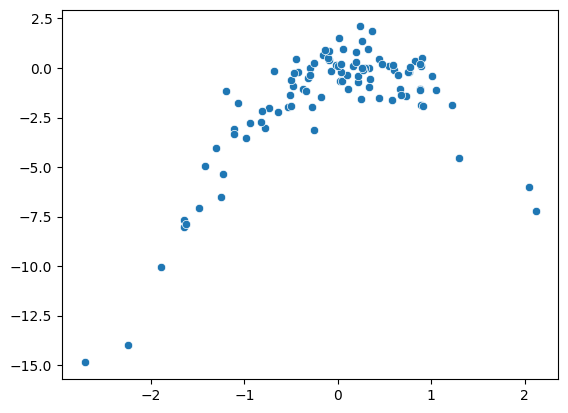

In [5]:
sns.scatterplot(x=x, y=y)

Podemos apreciar que existe una relacion cuadratica entre ambas variables, lo cual confirmamos porque viene de una ecuacion cuadratica.

### c

In [32]:
# necesitamos hacer una LOOCV en 4 modelos los cuales son polinomiales.
def loocv(design, df):
  X = design.fit_transform(df)
  y = df.y
  mse = np.zeros(df.shape[0])

  for i in range(X.shape[0]):
    X_train, X_test = X[X.index != i], X[X.index == i]
    y_train, y_test = y[y.index != i], y[y.index == i]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)
    mse[i] = (y_test.iloc[0] - y_hat[0]) ** 2
  return mse.mean()

In [39]:
models = [MS(["x"]),
          MS([poly("x", degree=2, raw=True)]),
          MS([poly("x", degree=3, raw=True)]),
          MS([poly("x", degree=4, raw=True)])]
loocv_values = np.zeros(4)
for i, model in enumerate(models):
  loocv_values[i] = loocv(model, df)
print(loocv_values)

[6.63302984 1.12293686 1.30179655 1.33239427]


utilizando kFold y cross_validadte caso especial de 1.

In [57]:
cv = KFold(
    n_splits=df.shape[0],
    shuffle=True,
    random_state=2025
)
loocv_values_cv = np.zeros(4)
for i, j in enumerate(range(1,5)):
  X = np.power.outer(x, np.arange(j+1))
  y = df.y
  lr_cv = cross_validate(LinearRegression(),
                         X,
                         y,
                         cv=cv,
                         scoring="neg_mean_squared_error")
  loocv_values_cv[i] = lr_cv["test_score"].mean()


In [59]:
print(-loocv_values_cv)

[6.63302984 1.12293686 1.30179655 1.33239427]


### d

repitiendo ejercicio con otro seed

In [62]:
cv = KFold(
    n_splits=df.shape[0],
    shuffle=True,
    random_state=2024
)
loocv_values_cv = np.zeros(4)
for i, j in enumerate(range(1,5)):
  X = np.power.outer(x, np.arange(j+1))
  y = df.y
  lr_cv = cross_validate(LinearRegression(),
                         X,
                         y,
                         cv=cv,
                         scoring="neg_mean_squared_error")
  loocv_values_cv[i] = lr_cv["test_score"].mean()
print(-loocv_values_cv)

[6.63302984 1.12293686 1.30179655 1.33239427]


podemos apreciar que en realidad son los mismo resultados quie la prueba anterior. Esto es debido a que el loocv no es un proceso que requiera de seleccion porque sabemos que solo toma un valor y el; resto n - 1 es usado para entrenar el modelo.

### e


podemos decir que el mejor modelo seria el cuadratico ya que tiene el menor valor de mse. el peor vendria a ser el modelo lineal debido a que tiene un alto bias.

### f

In [64]:
models = [MS(["x"]),
          MS([poly("x", degree=2, raw=True)]),
          MS([poly("x", degree=3, raw=True)]),
          MS([poly("x", degree=4, raw=True)])]
for i, model in enumerate(models):
  y = df.y
  X = model.fit_transform(df)
  model = sm.OLS(y, X)
  results = model.fit()
  print(summarize(results))

             coef  std err      t  P>|t|
intercept -1.4650    0.247 -5.937    0.0
x          1.9494    0.289  6.752    0.0
                                  coef  std err       t  P>|t|
intercept                      -0.0728    0.119  -0.611  0.543
poly(x, degree=2, raw=True)[0]  0.9663    0.126   7.647  0.000
poly(x, degree=2, raw=True)[1] -2.0047    0.091 -22.072  0.000
                                  coef  std err       t  P>|t|
intercept                      -0.0572    0.120  -0.477  0.635
poly(x, degree=3, raw=True)[0]  1.1146    0.187   5.945  0.000
poly(x, degree=3, raw=True)[1] -2.0471    0.099 -20.673  0.000
poly(x, degree=3, raw=True)[2] -0.0643    0.060  -1.070  0.287
                                  coef  std err       t  P>|t|
intercept                       0.1008    0.136   0.743  0.460
poly(x, degree=4, raw=True)[0]  0.9050    0.205   4.423  0.000
poly(x, degree=4, raw=True)[1] -2.5059    0.221 -11.336  0.000
poly(x, degree=4, raw=True)[2]  0.0338    0.073   0.466  0

Dado los mse por loocv calculados podemos apreciar que se corresponde con los valores de significancia obtenidos. El modelo lineal tiene un p valir menor a 0.05 pero muy cerca del nivel de descarte. Por otro lado el valor del pvalue y del estadistico t en el modelo cuadratico es alto para el feature x^2 lo que confirma que es el mejor modelo para esta data. Los otros modelos no son significativos estadisticamente.

## Ejercicio 9

In [65]:
boston = load_data("Boston")

In [66]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [67]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### a

In [69]:
# basado en al data proporcionar un estimado para u_hat of medv
boston.medv.mean()



np.float64(22.532806324110677)

### b

In [70]:
# proporcionar el standar error de u
boston.medv.std()/np.sqrt(boston.shape[0])

np.float64(0.4088611474975351)

### c

In [86]:
# ahora calcularemos bootstrap para calcular el st
# necesitamos calcular una 100 veces el valor de u en un data set,
# luego vamos a calcular el std con la formula de momentos.
def boot_se(data,
            B=1000,
            seed=0):
  rng = np.random.default_rng(seed)
  first, second = 0, 0
  for _ in range(B):
    idx = rng.choice(data.index, size=data.shape[0], replace=True)
    value = np.mean(data.iloc[idx])
    first += value
    second += value ** 2
  return np.sqrt(second / B - (first / B) ** 2)



In [88]:
data = boston.medv
print(boot_se(data, B=10000, seed=1))

0.40976659164537216


### d

In [91]:
se_u = boot_se(data, B=10000, seed=1)
u = boston.medv.mean()
print(u - 1.96 * se_u, u + 1.96 * se_u)

21.729663804485746 23.335948843735608


In [94]:
se = boston.medv.std()/np.sqrt(boston.shape[0])
print(u - 1.96 * se, u + 1.96 * se)

21.73143847501551 23.334174173205845


Ambos intervalos son muy cercanos y parecidos.

### e

In [95]:
# provide a u_medv median
boston.medv.median()

21.2

In [98]:
# ahora necesitqamos calcular el std de esta median. no existe un proximado
# en formula para la mediana por lo que tendremos que hallarla usando bootstrap
def boot_median(data,
            B=1000,
            seed=0):
  rng = np.random.default_rng(seed)
  first, second = 0, 0
  for _ in range(B):
    idx = rng.choice(data.index, size=data.shape[0], replace=True)
    value = np.median(data.iloc[idx])
    first += value
    second += value ** 2
  return np.sqrt(second / B - (first / B) ** 2)

In [100]:
u_median = boot_median(boston.medv, B=10000, seed=1)
u_median

np.float64(0.37954976997614637)

Con el cambio de valor para la mediana podemos hallar estos valores, la variacion que tendran sera de 0.37 aproximandamente.


### g

In [104]:
np.percentile(boston.medv,10)

np.float64(12.75)

### h

In [102]:
# ahora vamos a hallar un aproximado del percentil 10 por lo que modificacremos
# la funcion

def boot_percentil(data,
                   percentil,
            B=1000,
            seed=0):
  rng = np.random.default_rng(seed)
  first, second = 0, 0
  for _ in range(B):
    idx = rng.choice(data.index, size=data.shape[0], replace=True)
    value = np.percentile(data.iloc[idx], 10)
    first += value
    second += value ** 2
  return np.sqrt(second / B - (first / B) ** 2)

In [103]:
percentile_10_u = boot_percentil(boston.medv, 10, B=10000, seed=1)
print(percentile_10_u)

0.5079360794215755
